# Predicting USA Housing Prices

สำหรับโปรเจคนี้ ซึ่งเป็นโปรเจคแรกของผม ผมได้ฝึกทำ Model สำหรับ Predict ข้อมูล โดยใช้ Linear Regression

ผมได้นำเอาฐานข้อมูลมาจาก Online Course ที่ลงเรียนเอาไว้ ซึ่งก็คือ Python for Data Science and Machine Learning Bootcamp


โดยเป็นฐานข้อมูลเกี่ยวกับข้อมูลบ้านพักในระแวกหนึ่งของสหรัฐอเมริกา โดยมี features ดังต่อไปนี้

1. 'Avg. Area Income' : รายได้เฉลี่ยของผู้ที่พักอาศัยในย่านนั้น
2. 'Avg. Area House Age' : อายุโดยเฉลี่ยของบ้านพักในย่านนั้น
3. 'Avg. Area Number of Rooms' : จำนวนห้องทั้งหมดโดยเฉลี่ยของบ้านพักในย่านนั้น
4. 'Avg. Area Number of Bedrooms' : จำนวนห้องนอนโดยเฉลี่ยของบ้านพักในย่านนั้น
5. 'Area Population' : จำนวนประชากรในย่านนั้น
6. 'Price' : ราคาขายของบ้านหลังหนึ่งในย่านนั้น
7. 'Address' : ที่อยู่ของบ้านหลังหนึ่งในย่านนั้น


หลังจากที่ได้ทราบรายละเอียดโดยรวมของฐานข้อมูลนี้แล้ว ก็เข้าสู้ขั้นตอนของการตั้งคำถาม โดยคำถามมีอยู่ 2 ข้อดังนี้

1. feature หรือปัจจัยต่างๆเหล่านี้ มีผลมากน้อยต่อ feature Price เพียงใด?
2. ถ้าเราต้องการซื้อบ้านหรือขายบ้านหลังหนึ่งในอเมริกา โดยที่เราทราบรายละเอียดของบ้านทั้งหมด เราจะตั้งราคาขายอย่างไรให้เหมาะสม?

เมื่อทราบคำถามที่อยากจะรู้แล้ว ก็เข้าสู่ขั้นตอนการหาคำตอบได้เลย !

## Import Libraries
โดย Libraries ที่ผมใช้ได้แก่

* pandas : เป็น library หลักในโปรเจคนี้ ที่ใช้สำหรับการทำ Data Analysis https://pandas.pydata.org/
* matplotlib : เป็น library หลักสำหรับการสร้าง graph และทำ Data Visualization https://matplotlib.org/
* seaborn : เป็น libraby ที่คล้ายคลึงกับ matplotlib โดยในความคิดของผม seaborn จะ visualize ข้อมูลออกมาได้สวยงามและอ่านได้ง่ายกว่า matplotlib https://seaborn.pydata.org/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import the Data
ทำการนำเข้าฐานข้อมูล USA_Housing ซึ่งเป็นไฟล์นามสกุล csv (สามารถใช้ MS Excel เรียกดูได้)

In [2]:
house_df = pd.read_csv('USA_Housing.csv')

หลังจากนั้นทำการสุ่มตรวจเช็คข้อมูลว่า เพื่อเช็คว่าไฟล์ที่ถูกอ่านเข้ามานั้นอ่านสำเร็จหรือไม่ โดยสามารถตรวจเช็ควิธีอื่นๆได้ เช่น
>house_df.head()  # จะทำการหยิบข้อมูลจาก row บนสุดขึ้นมา

>house_df.tail() # จะทำการหยิบข้อมูลจาก row ล่างสุดขึ้นมา


In [3]:
house_df.sample(4)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
531,67972.630085,5.496668,6.337286,3.22,27865.330786,9.112022e+05,"8689 Nathan Cape Suite 323\nDavidshire, AR 24822"
1149,79097.134002,5.873084,8.007305,5.09,43950.662380,1.770617e+06,"PSC 4708, Box 5599\nAPO AA 90727"
3039,60285.606172,5.142415,9.916528,3.14,27370.185718,1.273554e+06,"537 Samantha Greens\nAvilaton, PA 17089-7225"
2275,85522.891079,6.020779,9.024116,4.37,49257.851103,2.009938e+06,494 Kathleen Route Apt. 078\nEast Tracichester...


หลังจากนั้นทำการตรวจเช็คข้อมูลทั้งหมดเพื่อดูว่ามี feature ไหน ที่มีข้อมูลหายไปหรือไม่(Missing Data)

ซึ่งโชคดี เพราะว่าข้อมูลทั้งหมดนั้นสมบูรณ์เรียบร้อยดี !

In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 253.9+ KB


# Statistical Information

ต่อมาทำการเช็คตัวเลขทางสถิติในแต่ละ feature ว่าเป็นอย่างไรบ้าง

In [5]:
house_df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


# Housing Prices Distribution

ทำการ plot การกระจายของ feature Price

และจากรูปแบบการกระจายด้านล่าง สามารถสรุปได้ว่า feature นี้ มีการกระจายแบบ Normal distribution ที่มีค่าเฉลี่ยคือ 1,232,073 และ ส่วนเบี่ยงเบนมาตรฐาน 353,117.6

สามารถตีความอย่างง่ายได้ว่า การตั้งราคาขายของบ้านในสหรัฐอเมริกานั้นมักจะไม่ตั้งราคาผิดแปลก, สูงหรือต่ำเกินไปจากราคาที่คนส่วนใหญ่ตั้งราคากัน

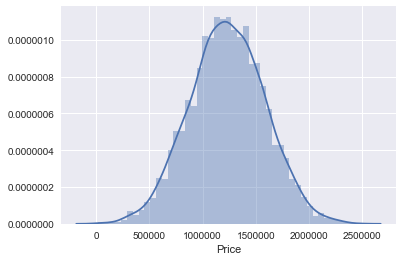

In [6]:
sns.set(style='darkgrid')
sns.distplot(house_df['Price'])

# Housing Prices Correlations

สุดท้ายหาความสัมพันธ์ในรูปแบบของ Correlation ระหว่าง feature ต่างๆ เทียบกับ feature Price และทำการ visualize ออกมาในรูปของ heatmap 

โดยทำการตัด feature Address ทิ้งออกไป เนื่องจากเป็นข้อมูลแบบ Qualitative ยากต่อการนำไปวิเคราะห์หาความสัมพันธ์

จาก heatmap ข้างล่างสามารถสรุปได้ว่า feature ที่มีผลต่อราคาขายบ้าน มากที่สุดคือ Avg. Area Income

สามารถตีความอย่างง่ายได้ว่า ยิ่งผู้พักอาศัยมีรายได้เฉลี่ยมากเท่าไร ก็มีแนวโน้มที่จะซื้อบ้านราคาแพงขึ้นเท่านั้น

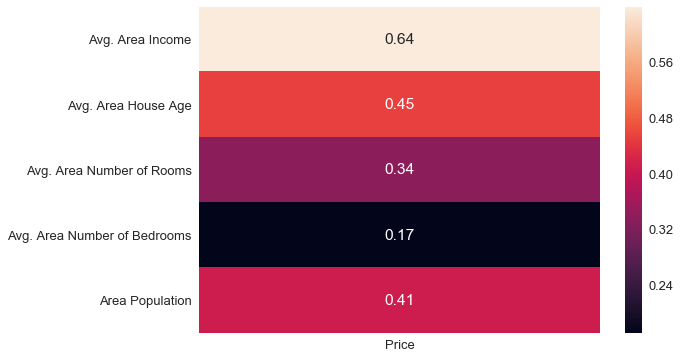

In [7]:
corr_price = pd.DataFrame(house_df.corr()['Price'], index=house_df.columns)
plt.figure(figsize=(9, 6))
sns.set(font_scale=1.3)
sns.heatmap(corr_price.drop(['Price', 'Address']), annot=True)

จากการวิเคราะห์ข้างต้นก็สามารถตอบคำถามในข้อแรกได้แล้ว ต่อมาเราจะมาหาคำตอบของคำถามข้อถัดมาคือ

ถ้าเราต้องการซื้อบ้านหรือขายบ้านหลังหนึ่งในอเมริกา (โดยที่เราทราบรายละเอียดของบ้านทั้งหมด) เราจะตั้งราคาขายอย่างไรให้เหมาะสม?

# Building Prediction Model using Linear Regression

สำหรับส่วนถัดมาคือการสร้าง Model เพื่อ predict ราคาขายบ้าน หรือ feature Price นั่นเอง

โดยจะ import library เพิ่มเติมอีกหนึ่งอัน ซึ่งก็คือ scikit-learn เป็น library ที่เกี่ยวกับการสร้าง machine learning เพื่อนำไปใช้สำหรับการ predict ข้อมูล http://scikit-learn.org/stable/

สำหรับทำการ fit ข้อมูล จะใช้ algorithm ประเภท linear regression (https://en.wikipedia.org/wiki/Linear_regression) 

ซึ่งหลังจาก fit data เสร็จแล้ว ผลที่ได้ออกมาคือจะเป็นสมการเส้นตรงที่เป็นตัวแทนของ ราคาขายบ้าน นั่นเอง

## Splitting Data

ขั้นแรกทำการสร้าง Dataframe เป็น 2 อัน ชื่อว่า X และ y

โดยที่ X ประกอบด้วย ทุก feature ยกเว้น feature Price ของฐานข้อมูล USA_Housing

และ y มีเพียงแค่ feature Price ของฐานข้อมูล USA_Housing

หลังจากนั้นทำการแบ่ง X และ y อีกเป็นอย่างละ 2 ชุดอย่างสุ่ม เพื่อนำไปใช้ train และ test model ต่อไป

โดยจะแบ่งด้วยอัตราส่วนของข้อมูลดังนี้

1. Training set 70% ของ (X,y) ทั้งหมด
2. Testing set 30% ของ (X,y) ที่เหลือ

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = house_df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = house_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Fitting Data

ขั้นต่อมาทำการใช้ Training set เพื่อ fit data และ model ก็จะถูกสร้างออกมา

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lm = LinearRegression()

In [12]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Interpreting the Model

เมื่อได้ model ออกมาแล้ว ก็ทำการตีความ model จากข้อมูลด้านล่างออกมาได้ดังนี้

- ให้ features อื่นๆ คงที่ แล้ว**เพิ่มAvg. Area Income** ขึ้น 1 หน่วย จะทำให้ Price **เพิ่มขึ้น \$21.52 **.
- ให้ features อื่นๆ คงที่ แล้ว**เพิ่มAvg. Area House Age** ขึ้น 1 หน่วย จะทำให้ Price **เพิ่มขึ้น \$164883.28 **.
- ให้ features อื่นๆ คงที่ แล้ว**เพิ่มAvg. Area Number of Rooms** ขึ้น 1 หน่วย จะทำให้ Price **เพิ่มขึ้น \$122368.67 **.
- ให้ features อื่นๆ คงที่ แล้ว**เพิ่มAvg. Area Number of Bedrooms** ขึ้น 1 หน่วย จะทำให้ Price **เพิ่มขึ้น \$2233.80 **.
- ให้ features อื่นๆ คงที่ แล้ว**เพิ่มArea Population** ขึ้น 1 หน่วย จะทำให้ Price **เพิ่มขึ้น \$15.15 **.

In [13]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.598514
Avg. Area House Age,165641.393655
Avg. Area Number of Rooms,120514.980789
Avg. Area Number of Bedrooms,478.556603
Area Population,15.364537


# Predictions from the Model

หลังจากได้ model เรียบร้อยแล้วก็นำ Testing set มาใช้ให้ model ได้ลอง predict ออกมาดู เพื่อดูว่ามี error เกิดขึ้นมากน้อยแค่ไหน

In [14]:
pred = lm.predict(X_test)

สร้าง Scatter plot ระหว่าง ค่าที่เก็บมาจริงๆ(แกน x) และค่าที่ predict ออกมาจาก model(แกน y)

จะเห็นว่า ถ้าเราลากเส้นตรงที่เป็นตัวแทนของจุดบนกราฟข้างล่าง แล้วเส้นตรงนั้นมีความชันเข้าใกล้ 1 มากเท่าไร

จากสมการ y = (slope)x ดังนั้น y = x  หมายความว่า model ของเราจะมีความแม่นยำสูงมากขึ้นเท่านั้น

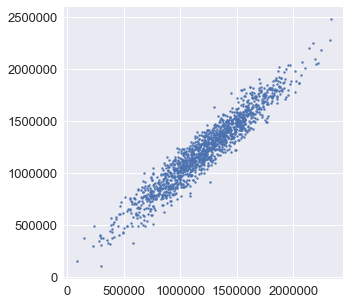

In [15]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test,pred, s=4)

สร้าง Distribution plot ของ Residual(Actual-Prediction) เพื่อดูลักษณะการกระจายของการ predict

จะเห็นว่า error จากการ predict นั้น โดยเฉลี่ยเท่ากับ 0 นั่นคือ predict ได้แม่นยำตามค่า actual

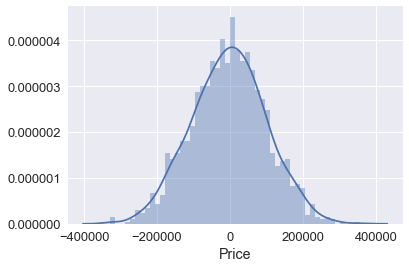

In [16]:
sns.distplot((y_test-pred),bins=50)

## Regression Evaluation Metrics

ขออ้างอิงจากบทเรียน Python for Data Science and Machine Learning Bootcamp ถึงความหมายของตัวชี้วัด model

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

สำหรับข้อแตกต่างของแต่ละตัวนั่นคือ

- **MAE** เข้าใจได้ง่ายที่สุด เพราะเอา error ของแต่ละตัว มาหาค่าเฉลี่ยทั้งหมด
- **MSE** ถูกใช้งานเยอะกว่าตัวแรก โดยจะคล้ายๆกับ MAE แต่จะ take กำลัง2 เข้าไปในแต่ละ error ซึ่ง model ไหนที่ predict ห่างจากค่า actual มากๆและบ่อยๆ จะทำให้ค่าจากตัวชี้วัดนี้สูงมากๆ
- **RMSE** ถูกใช้งานเยอะกว่า MSE เพราะเมื่อนำเอา MSE ใส่ Square root แล้วจะสามารถตีความเป็นหน่วยเดียวกับที่ predict ได้เลย

In [17]:
from sklearn import metrics

In [19]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
import numpy as np
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 81349.240919
MSE: 10408992254.1
RMSE: 102024.468899


ทั้งหมดนี้คือ **loss functions** ที่เราควรจะต้องทำให้มีค่าน้อยที่สุด เพื่อทำให้ model ของเรามีประสิทธิภาพมากขึ้น